In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
#40 different tarrgets //classes
oliv=datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Manoj\scikit_learn_data


In [6]:
print(oliv.keys())
#data has flattened images 
print(oliv['data'].shape)
print(oliv['images'].shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 4096)
(400, 64, 64)


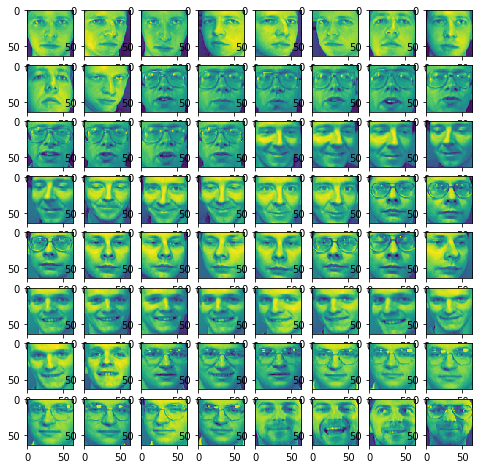

In [9]:
#plotting  the images
fig=plt.figure(figsize=(8,8)) # 8X8 space created
# making 8 rows and 8 columns and each cell an image 
#DRAWING ONLY FIRST 64 images
for i in range(64):
    ax=fig.add_subplot(8,8,i+1) # no of parameters-rows,now of cols, position (starting from 1)
    ax.imshow(oliv.images[i])
plt.show()
    

In [ ]:
#first 10 images are of same person and next 10 of  same person

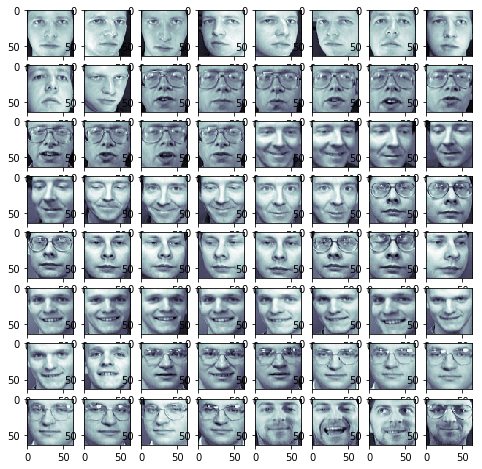

In [10]:
#plotting  the images with different theme
fig=plt.figure(figsize=(8,8)) # 8X8 space created
# making 8 rows and 8 columns and each cell an image 
#DRAWING ONLY FIRST 64 images
for i in range(64):
    ax=fig.add_subplot(8,8,i+1) # no of parameters-rows,now of cols, position (starting from 1)
    ax.imshow(oliv.images[i],cmap=plt.cm.bone)
plt.show()
    #x_ticks  and y_ticks are 0 and  50 shown in plot

In [11]:
x=oliv.data #as PCA needs in this form only
y=oliv.target

In [28]:
pca=PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
pca.components_.shape
#coz by default it takes min (features ,data os n_components which is 400 out of 400 and 4096)
#further each unit vector needs to be expressed in 4096  space using 4096 value

(400, 4096)

In [30]:
#finding optimum value of features needed
k=0
total=sum(pca.explained_variance_)
current_sum=0
while current_sum/total < 0.95:
    current_sum+=pca.explained_variance_[k]
    k+=1
print(k) # only 123 features needed out  of 4096 for keeping 95 percent of total information

123


In [33]:
pca=PCA(n_components=k,whiten=True) #whiten =true similiar to feature_scaling #these 123 will be 0 mean and variance
transformed_data=pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [35]:
#retrieving images back and displaying
x_approx=pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [37]:
#for display we need to reshape it 
x_approx_images=x_approx.reshape((400,64,64))

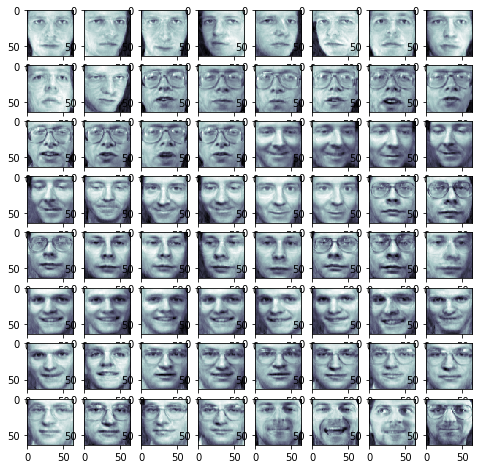

In [39]:
#plotting  the images with different theme
fig=plt.figure(figsize=(8,8)) # 8X8 space created

for i in range(64):
    ax=fig.add_subplot(8,8,i+1) # no of parameters-rows,now of cols, position (starting from 1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()
   #amazing to see still have all the data even after pca and time improved ...AMAZING

In [40]:
#lets draw eigenvectors
eigenv=pca.components_
eigenv.shape

(123, 4096)

In [41]:
eigenfaces=eigenv.reshape((123,64,64))

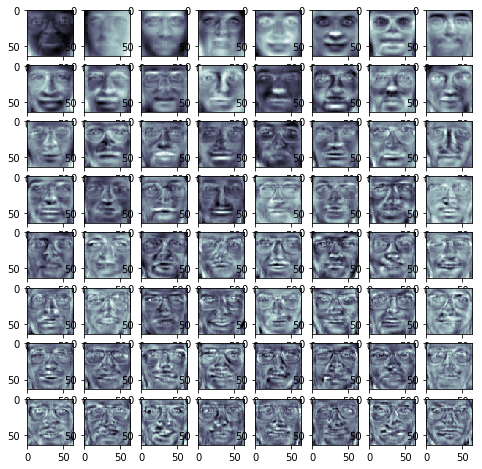

In [45]:
#plotting  eigenfaces
fig=plt.figure(figsize=(8,8)) # 8X8 space created

for i in range(64):
    ax=fig.add_subplot(8,8,i+1) # no of parameters-rows,now of cols, position (starting from 1)
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)
plt.show()
  #They dont look like random data
    #each eigen vector looks something similiar to face hence calling eigen faces
    #Each new principal component is representing  some feature of image
    #some might be focusing on lips  or eyes or specs , different aspects of face
    #Our  original features were having info of just one pixel , very minimal info
    #they carry huge info now